In [1]:
#library
!pip install tensorflow matplotlib scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [4]:
# TensorFlow
(ds_train_tf, ds_test_tf), ds_info = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True, with_info=True)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label
# Use the correct variable name ds_train_tf instead of ds_train
ds_train_tf = ds_train_tf.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)
# Use the correct variable name ds_test_tf instead of ds_test
ds_test_tf = ds_test_tf.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)

In [5]:
#Load dataset PyTorch
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)
testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 182M/182M [00:13<00:00, 14.0MB/s]
100%|██████████| 64.3M/64.3M [00:07<00:00, 8.89MB/s]


In [6]:
cnn_tf = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# TensorFlow
(ds_train_tf, ds_test_tf), ds_info = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True, with_info=True)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label
ds_train_tf = ds_train_tf.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)
ds_test_tf = ds_test_tf.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)


cnn_tf = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


def preprocess_initial(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

(ds_train_tf, ds_test_tf), ds_info = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True, with_info=True)
ds_train_tf = ds_train_tf.map(preprocess_initial).batch(64).prefetch(tf.data.AUTOTUNE)
ds_test_tf = ds_test_tf.map(preprocess_initial).batch(64).prefetch(tf.data.AUTOTUNE)


history = cnn_tf.fit(ds_train_tf, validation_data=ds_test_tf, epochs=5)

Epoch 1/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 126s 107ms/step - accuracy: 0.5556 - loss: 1.3464 - val_accuracy: 0.8284 - val_loss: 0.6370
Epoch 2/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 122s 106ms/step - accuracy: 0.8534 - loss: 0.5302 - val_accuracy: 0.8533 - val_loss: 0.5369
Epoch 3/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 108s 94ms/step - accuracy: 0.8775 - loss: 0.4387 - val_accuracy: 0.8664 - val_loss: 0.4821
Epoch 4/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 109s 95ms/step - accuracy: 0.8910 - loss: 0.3791 - val_accuracy: 0.8712 - val_loss: 0.4585
Epoch 5/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 106s 92ms/step - accuracy: 0.9019 - loss: 0.3390 - val_accuracy: 0.8719 - val_loss: 0.4657


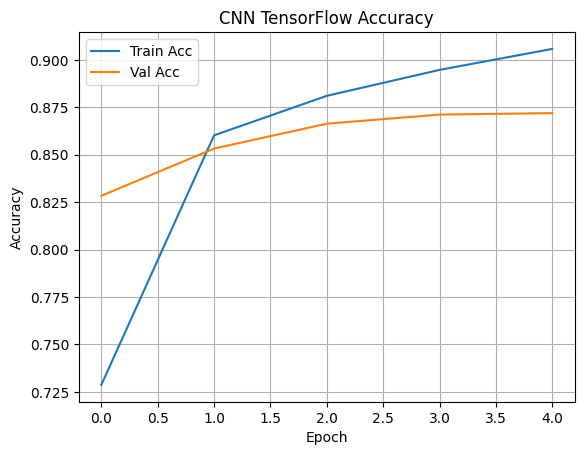

In [16]:
#Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN TensorFlow Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#MLP TensorFlow
mlp_tf = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_tf.fit(ds_train_tf, validation_data=ds_test_tf, epochs=5)

Epoch 1/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.1759 - loss: 2.2979 - val_accuracy: 0.1959 - val_loss: 2.2229
Epoch 2/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.1893 - loss: 2.2271 - val_accuracy: 0.1959 - val_loss: 2.2188
Epoch 3/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1893 - loss: 2.2030 - val_accuracy: 0.1959 - val_loss: 2.1772
Epoch 4/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.1893 - loss: 2.1782 - val_accuracy: 0.1959 - val_loss: 2.1669
Epoch 5/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.1893 - loss: 2.1694 - val_accuracy: 0.1959 - val_loss: 2.1609


In [18]:
class CNN_PT(nn.Module):
    def __init__(self):
        super(CNN_PT, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model_pt = CNN_PT()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pt.parameters(), lr=0.001)

In [20]:
#Training PyTorch CNN
for epoch in range(5):
    model_pt.train()
    running_loss = 0.0
    # Corrected the DataLoader variable name from train_loader_pt to trainloader
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model_pt(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

Epoch 1, Loss: 1164.2058
Epoch 2, Loss: 600.4846
Epoch 3, Loss: 509.1780
Epoch 4, Loss: 453.9483
Epoch 5, Loss: 411.3064


In [21]:
# Evaluation CNN TF
import tensorflow as tf
true_labels = []
pred_labels = []
for batch in ds_test_tf:
    images, labels = batch
    preds = cnn_tf.predict(images)
    pred_classes = tf.argmax(preds, axis=1)
    true_labels.extend(labels.numpy())
    pred_labels.extend(pred_classes.numpy())
print(classification_report(true_labels, pred_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━

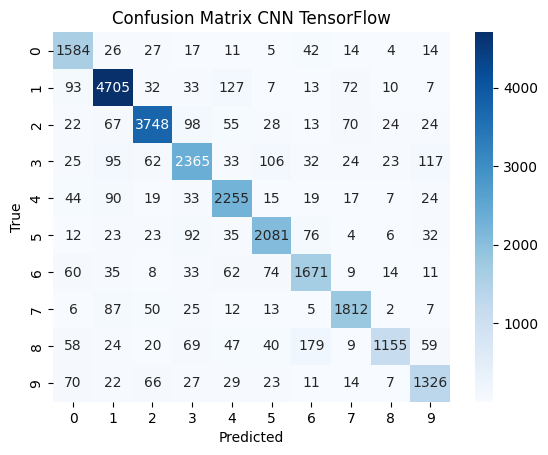

In [22]:
# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix CNN TensorFlow')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
# ROC Curve (multi-class AUC)
true_onehot = tf.one_hot(true_labels, depth=10).numpy()
# Pass the already batched ds_test_tf directly to predict
preds_proba = cnn_tf.predict(ds_test_tf)
auc_score = roc_auc_score(true_onehot, preds_proba, multi_class='ovr')
print("AUC Score (OvR):", auc_score)

407/407 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step
AUC Score (OvR): 0.9862163567800565


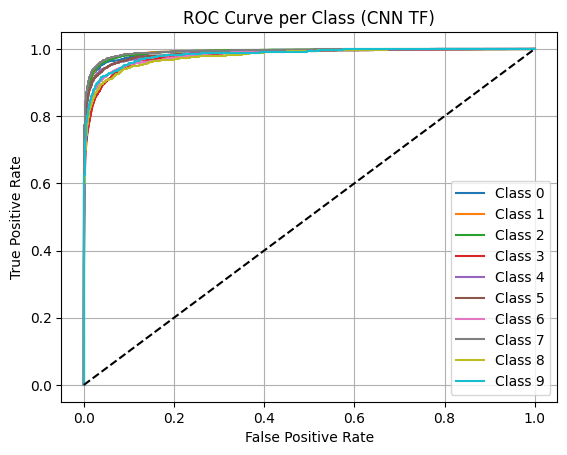

In [25]:
# ROC Curve per Kelas
fpr = dict()
tpr = dict()
thresh = dict()
for i in range(10):
    fpr[i], tpr[i], thresh[i] = roc_curve(true_onehot[:, i], preds_proba[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve per Class (CNN TF)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Penjelasan Persamaan Matematika untuk Metrik Evaluasi

**1. Akurasi**
\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]
Mengukur proporsi prediksi yang benar dari seluruh data.

**2. Presisi**
\[
\text{Precision} = \frac{TP}{TP + FP}
\]
Mengukur seberapa tepat model saat memprediksi kelas positif.

**3. Recall**
\[
\text{Recall} = \frac{TP}{TP + FN}
\]
Mengukur seberapa baik model menemukan semua data positif.

**4. F1 Score**
\[
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\]
Rata-rata harmonik dari presisi dan recall.

**5. AUC (Area Under Curve)** dan **ROC (Receiver Operating Characteristic Curve)**  
AUC mengukur luas di bawah kurva ROC yang merepresentasikan trade-off antara True Positive Rate dan False Positive Rate.
